# Bikes Sharing Assignment

- A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

------------------------------------------------------------------------------------------------------------------------------

- In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

- Problem Statement

     - Which variables are significant in predicting the demand for shared bikes.
     - How well those variables describe the bike demands

- The solution notebook is divided in to below steps and section -

     - Step 1 : Importing the warnings and required libraries
     - Step 2 : Reading the dataset and Feature Engineering
     - Step 3 : Visualizing the structured data using basic EDA
     - Step 4 : Data Preparation
     - Step 5 : Splitting the Data into Training and Testing Sets, Rescalling
     - Step 6 : Building linear model
     - Step 7 : Residual analysis of the chosen Model (i.e. Train dataset)
     - Step 8: Defining Predictions and the Finalizing the Model
     - Step 9 : Evaluating the Model
     - Step 10 : R - Sqaured Score and Implications

- Answers to the Business Questions raised

# Step 1 : Importing the warnings and required libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# Step 2 : Reading the dataset and Feature Engineering

In [4]:
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bike.shape

(730, 16)

In [6]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
#Checking for missing values, if any

bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- We can see that the data set has no null values, we can move on now with the Feature Engineering

- We can drop unnecessary columns to simplify our analysis. We can drop the following

  - instant - as it contains the row number
  - dteday - as we have the month and year of the rental service we can ignore this column
  - casual - as we have the total number of users including casual and registered in 'cnt' column, we can ignore this as we would find aggregated number of them in the separate column
  - registered - for the similar above reason

In [8]:
bike.drop(columns=["instant","dteday", "casual","registered"],inplace=True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


- We can now map the values of the component in columns like season,mnth etc. as per the data dictionary to make the data much more structured.

In [9]:
#Mapping seasons to actual season names 
bike['season'] = bike['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

In [10]:
#Mapping mnth to actual month
bike['mnth'] = bike['mnth'].map({1: 'Jan', 2: 'Feb', 3: 'March', 4: 'Apr', 5: 'May', 6: 'June', 7: 'July', 8: 'Aug', 9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

In [11]:
#Mapping weekday to actual weekdays
bike['weekday'] = bike['weekday'].map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thurs', 5: 'Fri', 6: 'Sat'})

In [12]:
#Mapping weather to actual weather conditions
bike['weathersit'] = bike['weathersit'].map({
    1: 'Clear',
    2: 'Cloudy_mist',
    3: 'Light_Rain_Thunder',
    4: 'Heavy_Rain_thunder'})

In [13]:
#Mapping weather to actual weather conditions

bike['yr']= bike['yr'].map({0: "2018", 1: "2019"})

In [14]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,2018,Jan,0,Mon,1,Cloudy_mist,14.110847,18.18125,80.5833,10.749882,985
1,Spring,2018,Jan,0,Tue,1,Cloudy_mist,14.902598,17.68695,69.6087,16.652113,801
2,Spring,2018,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,2018,Jan,0,Thurs,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,2018,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 68.6+ KB


- The dataset is now structured manner, allowing us to draw insights from it.

# Step 3 : Visualizing the structured data using basic EDA

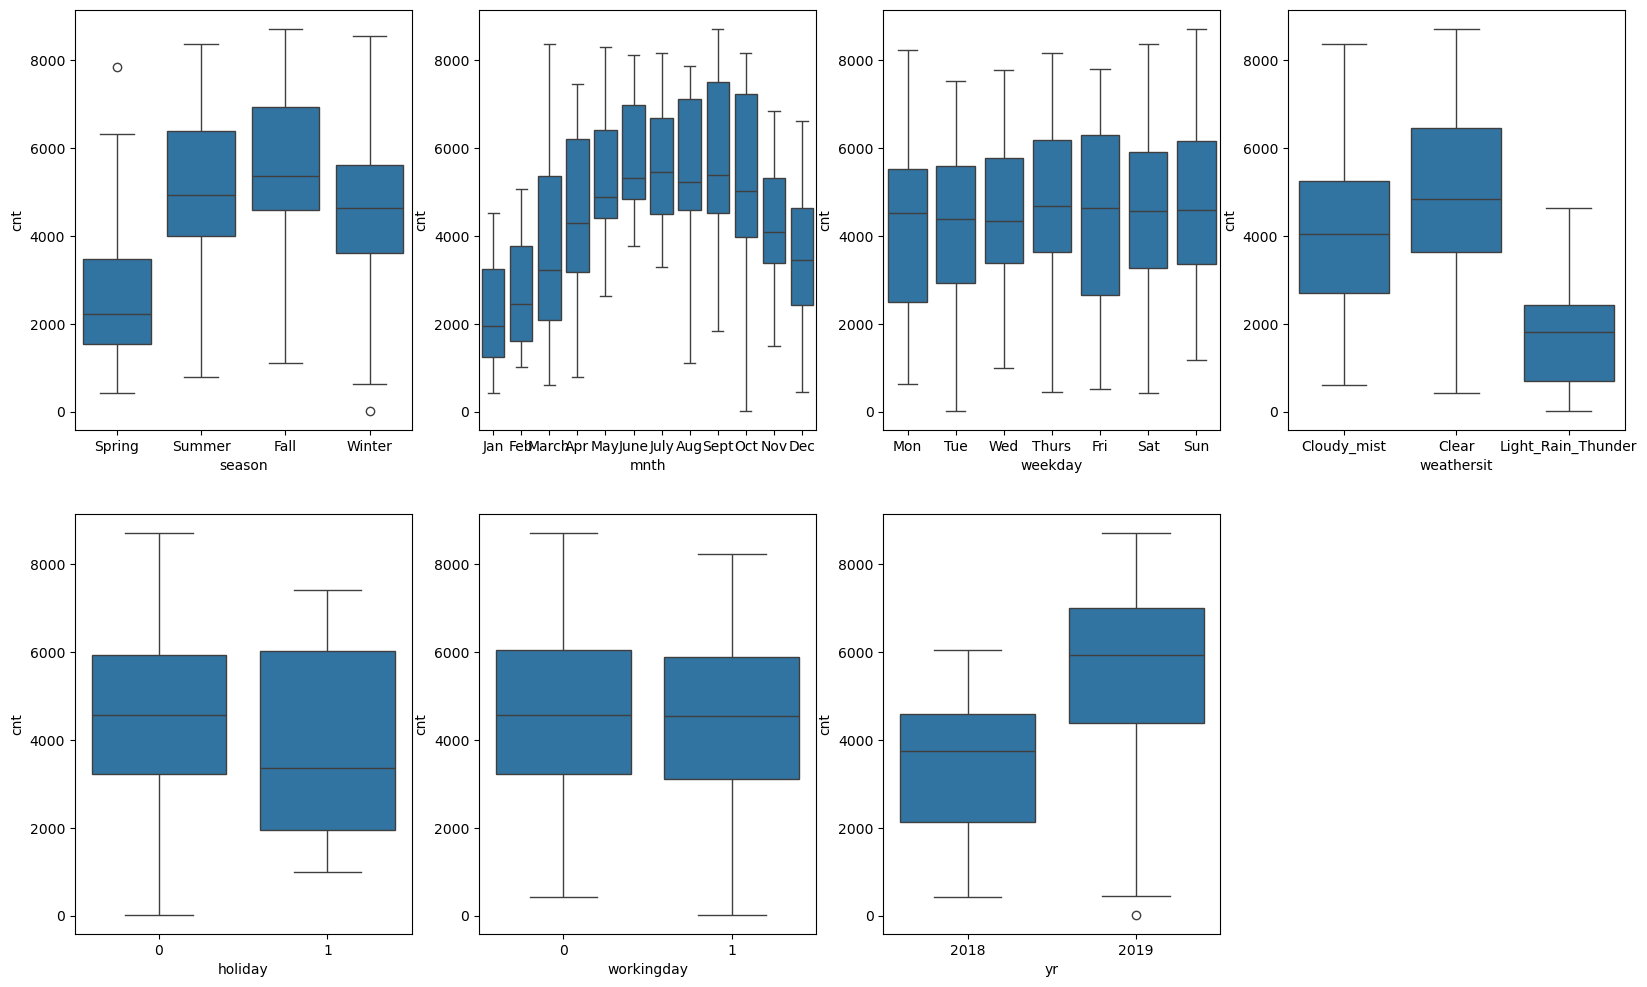

In [17]:
#visualizing variables (categorical columns)

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.show()

INSIGHTS -

- Season - Summer and Fall have the highest bike rentals, indicating these seasons are popular for biking. Spring has a moderate number of rentals, while Winter shows the lowest median rentals, likely due to colder weather.

- Year - The boxplot suggests that the number of bike rentals increased in the second year,as the median and overall distribution are higher compared to the first year.

- Month - The months June, July, August, and September show higher rentals, indicating the warm weather.January, February, and December have lower rentals, probably due to cold weather.

- Holiday - The distribution of bike rentals on holidays and non-holidays is similar, with a slightly higher median on non-holidays.

- Weekday - Bike rentals appear to be fairly consistent across all weekdays, with no significant difference between them.

- Working Day - The number of bike rentals is quite similar on workdays and non-workdays, indicating consistent usage regardless of the workday status.

- Weathersit - Clear weather conditions result in the highest bike rentals. Cloudy/Misty conditions show moderate rentals. Light Rain/Thunder conditions have the lowest rentals, which is expected due to less favorable weather.

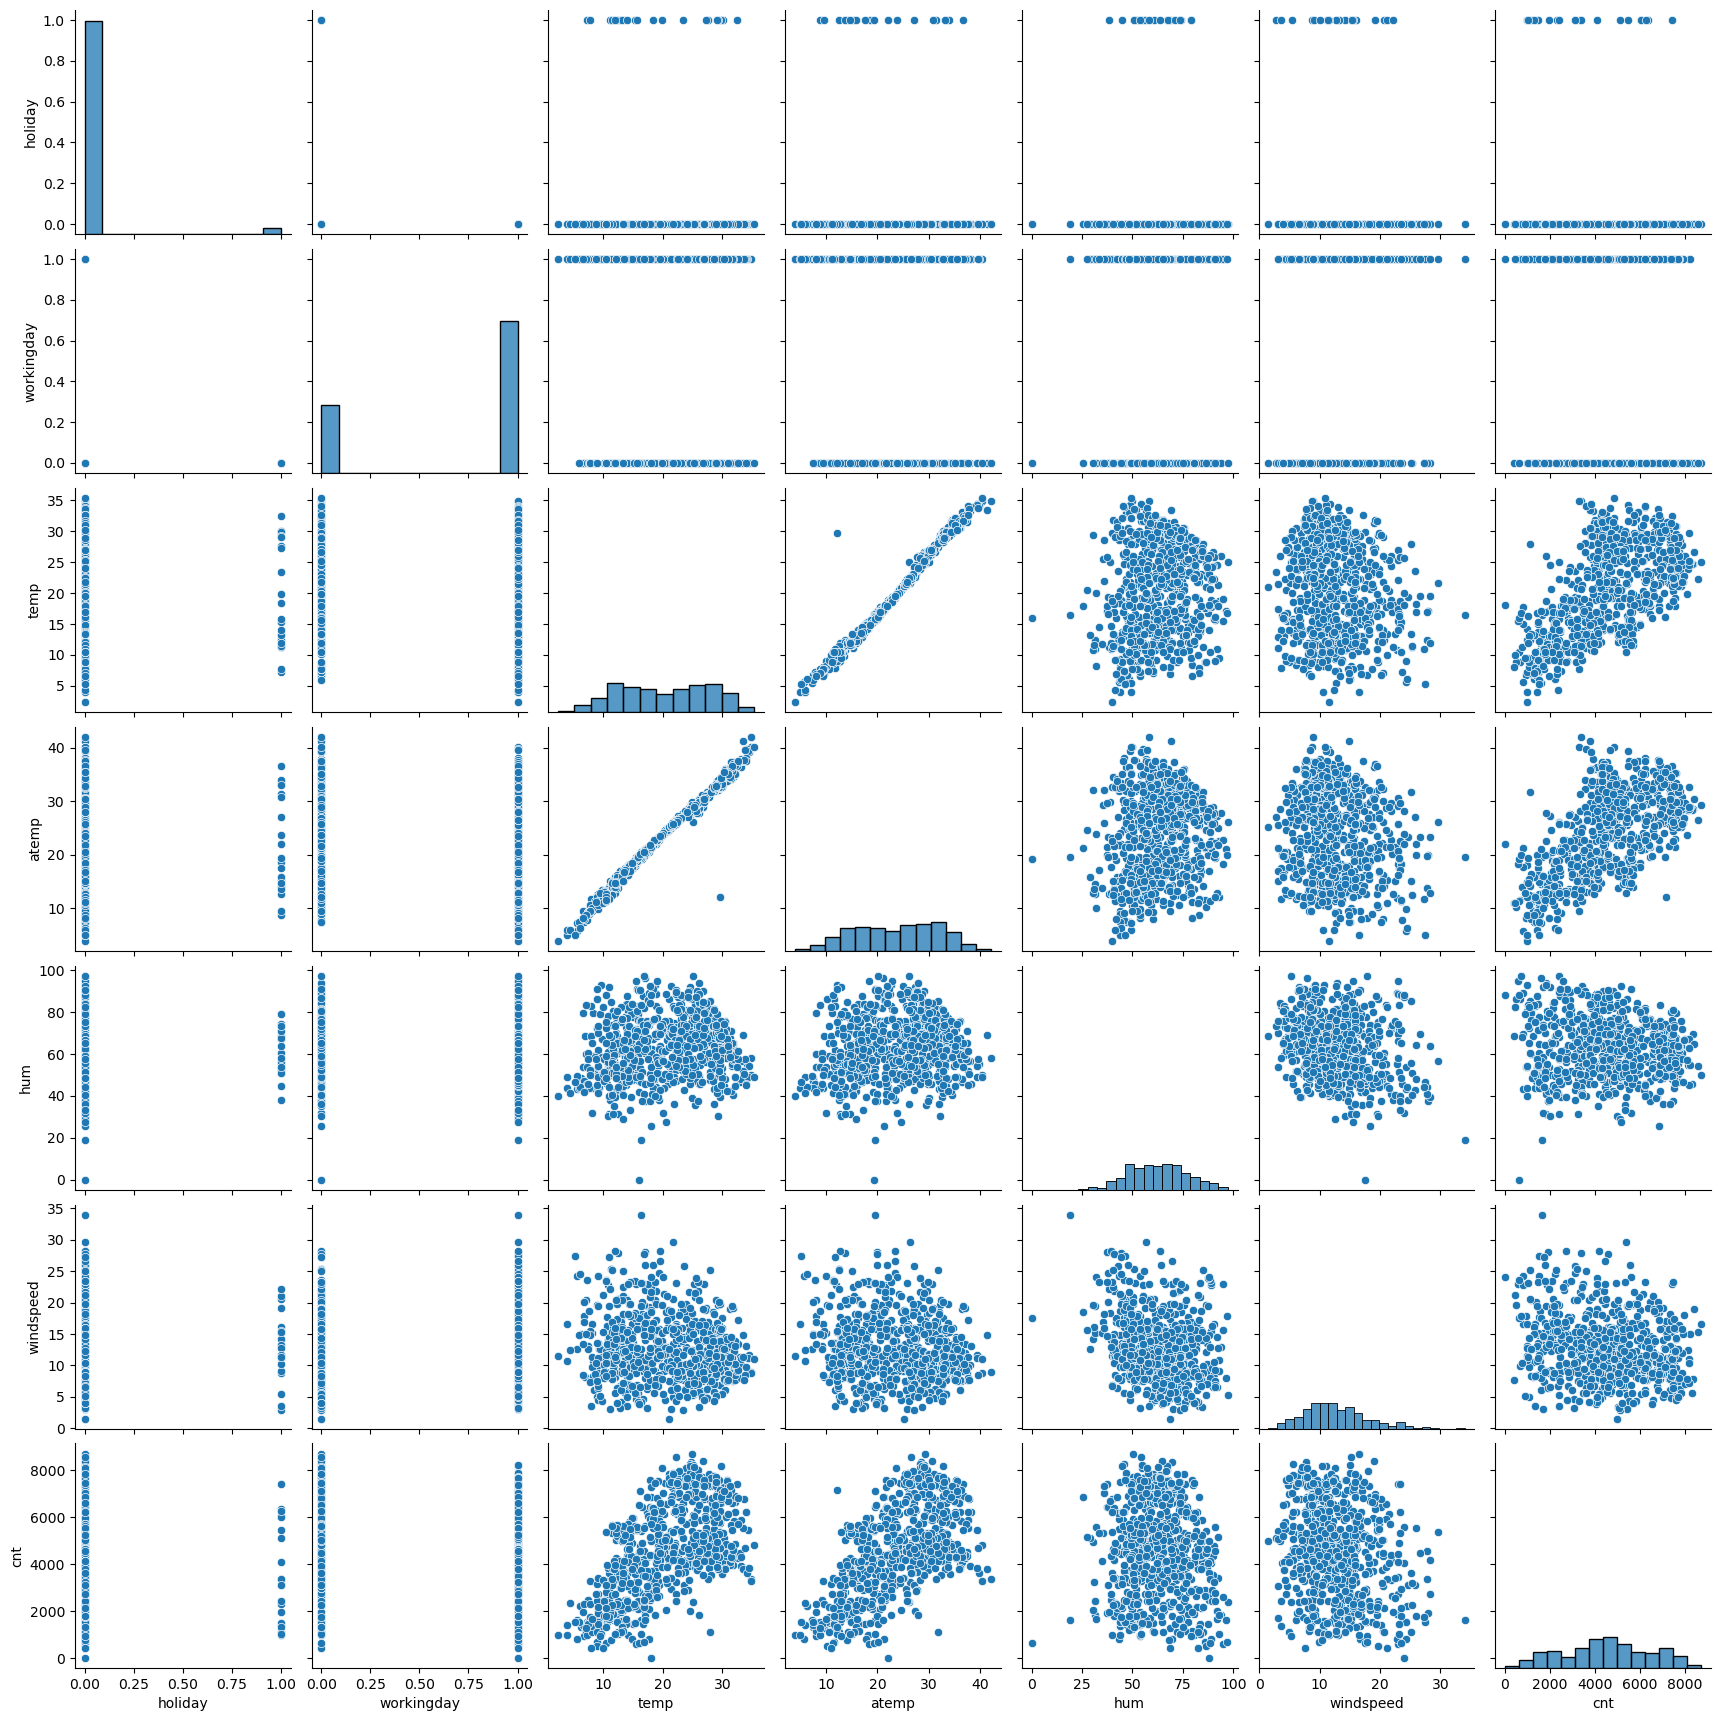

In [18]:
#visualizing variables (numerical columns)

sns.pairplot(bike)
plt.show()

INSIGHTS -

- The pairplots showing no correlation are the categorical columns for which we have analysed above. So we would not analyse them in here.
- Temp and atemp show normal-like distributions which are almost similar.
- The relationship between humidity and cnt is less clear, though there might be a slight negative correlation where very high humidity tends to have lower bike rentals.
- Windspeed does not show a strong correlation with cnt, implying that wind speed might not significantly impact bike rentals.

- We can find the correlation and plot the numerical columns to further understand the correlation

In [19]:
#Correlation in the numerical columns

bike[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.627044,0.630685,-0.098543,-0.235132,1.000000


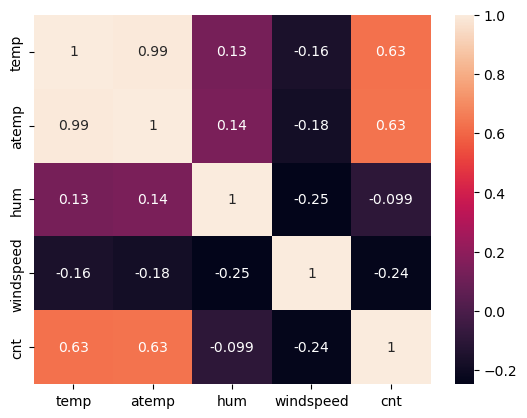

In [20]:
#Visualisation of the correlation 


sns.heatmap(bike[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr(), annot=True)
plt.show()

INSIGHTS -

- temp and atemp are almost perfectly correlated, which is expected since atemp represents the feeling temperature, which is highly dependent on the actual temperature. We can actually drop atemp to avoid any confusion and further skewing.

- temp and cnt have a strong positive correlation between temperature and bike rentals, indicating that higher temperatures are associated with more bike rentals.

- windspeed and cnt creates a moderate negative correlation between wind speed and bike rentals, suggesting that higher wind speeds might slightly reduce the number of bike rentals.

- hum and cnt creates a weakly negative correlation, indicating that humidity does not have a strong impact on the number of bike rentals.

In [21]:
#dropping atemp 

bike.drop(['atemp'],axis=1,inplace=True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,2018,Jan,0,Mon,1,Cloudy_mist,14.110847,80.5833,10.749882,985
1,Spring,2018,Jan,0,Tue,1,Cloudy_mist,14.902598,69.6087,16.652113,801
2,Spring,2018,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,2018,Jan,0,Thurs,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,2018,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


# Step 4 : Data Preparation

- Now we can prepare the data, starting with dummification of the dataset

In [25]:
#Creating Dummies

season_dummy = pd.get_dummies(bike['season'],drop_first=True, dtype=int)
mnth_dummy = pd.get_dummies(bike['mnth'],drop_first=True, dtype=int)
weekday_dummy = pd.get_dummies(bike['weekday'],drop_first=True, dtype=int)
weathersit_dummy = pd.get_dummies(bike['weathersit'],drop_first=True, dtype=int)

In [26]:
#Concatenating the dummies into the dataset

bike = pd.concat([bike,season_dummy, mnth_dummy, weekday_dummy, weathersit_dummy],axis=1)

In [28]:
#dropping the original columns

bike.drop(columns=['season','mnth','weekday','weathersit'],inplace=True)

In [29]:
bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,Oct,Sept,Mon,Sat,Sun,Thurs,Tue,Wed,Cloudy_mist,Light_Rain_Thunder
0,2018,0,1,14.110847,80.5833,10.749882,985,True,False,False,...,0,0,1,0,0,0,0,0,1,0
1,2018,0,1,14.902598,69.6087,16.652113,801,True,False,False,...,0,0,0,0,0,0,1,0,1,0
2,2018,0,1,8.050924,43.7273,16.636703,1349,True,False,False,...,0,0,0,0,0,0,0,1,0,0
3,2018,0,1,8.200000,59.0435,10.739832,1562,True,False,False,...,0,0,0,0,0,1,0,0,0,0
4,2018,0,1,9.305237,43.6957,12.522300,1600,True,False,False,...,0,0,0,0,0,0,0,0,0,0


In [32]:
bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'Spring', 'Summer', 'Winter', 'Aug', 'Dec', 'Feb', 'Jan', 'July',
       'June', 'March', 'May', 'Nov', 'Oct', 'Sept', 'Mon', 'Sat', 'Sun',
       'Thurs', 'Tue', 'Wed', 'Cloudy_mist', 'Light_Rain_Thunder', 'Spring',
       'Summer', 'Winter', 'Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'March',
       'May', 'Nov', 'Oct', 'Sept', 'Mon', 'Sat', 'Sun', 'Thurs', 'Tue', 'Wed',
       'Cloudy_mist', 'Light_Rain_Thunder'],
      dtype='object')

# Step 5: Splitting the Data into Training and Testing Sets, Rescalling

In [30]:
#Mentioning this so that the train and test data set always have the same rows, respectively

np.random.seed(30)

bike_train, bike_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [31]:
#checking shape of train and test dataframe

print("Train dataframe : ",bike_train.shape)
print("Test dataframe : ",bike_test.shape)

Train dataframe :  (510, 51)
Test dataframe :  (219, 51)


- Rescalling the dataset

In [35]:
scaler = MinMaxScaler()

In [36]:
#Appyling the scaler

num_vars = num_vars = ['temp','hum','windspeed']
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [37]:
bike_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,Oct,Sept,Mon,Sat,Sun,Thurs,Tue,Wed,Cloudy_mist,Light_Rain_Thunder
653,2019,0,1,0.509887,0.575354,0.300794,7534,False,False,True,...,1,0,0,0,0,0,0,1,0,0
576,2019,0,1,0.815169,0.725633,0.264686,7216,False,False,False,...,0,0,0,0,0,0,0,1,0,0
426,2019,0,0,0.442393,0.640189,0.255342,4066,True,False,False,...,0,0,0,0,1,0,0,0,1,0
728,2019,0,1,0.245101,0.498067,0.663106,1796,True,False,False,...,0,0,1,0,0,0,0,0,0,0
482,2019,0,0,0.395666,0.504508,0.188475,4220,False,True,False,...,0,0,0,0,1,0,0,0,1,0


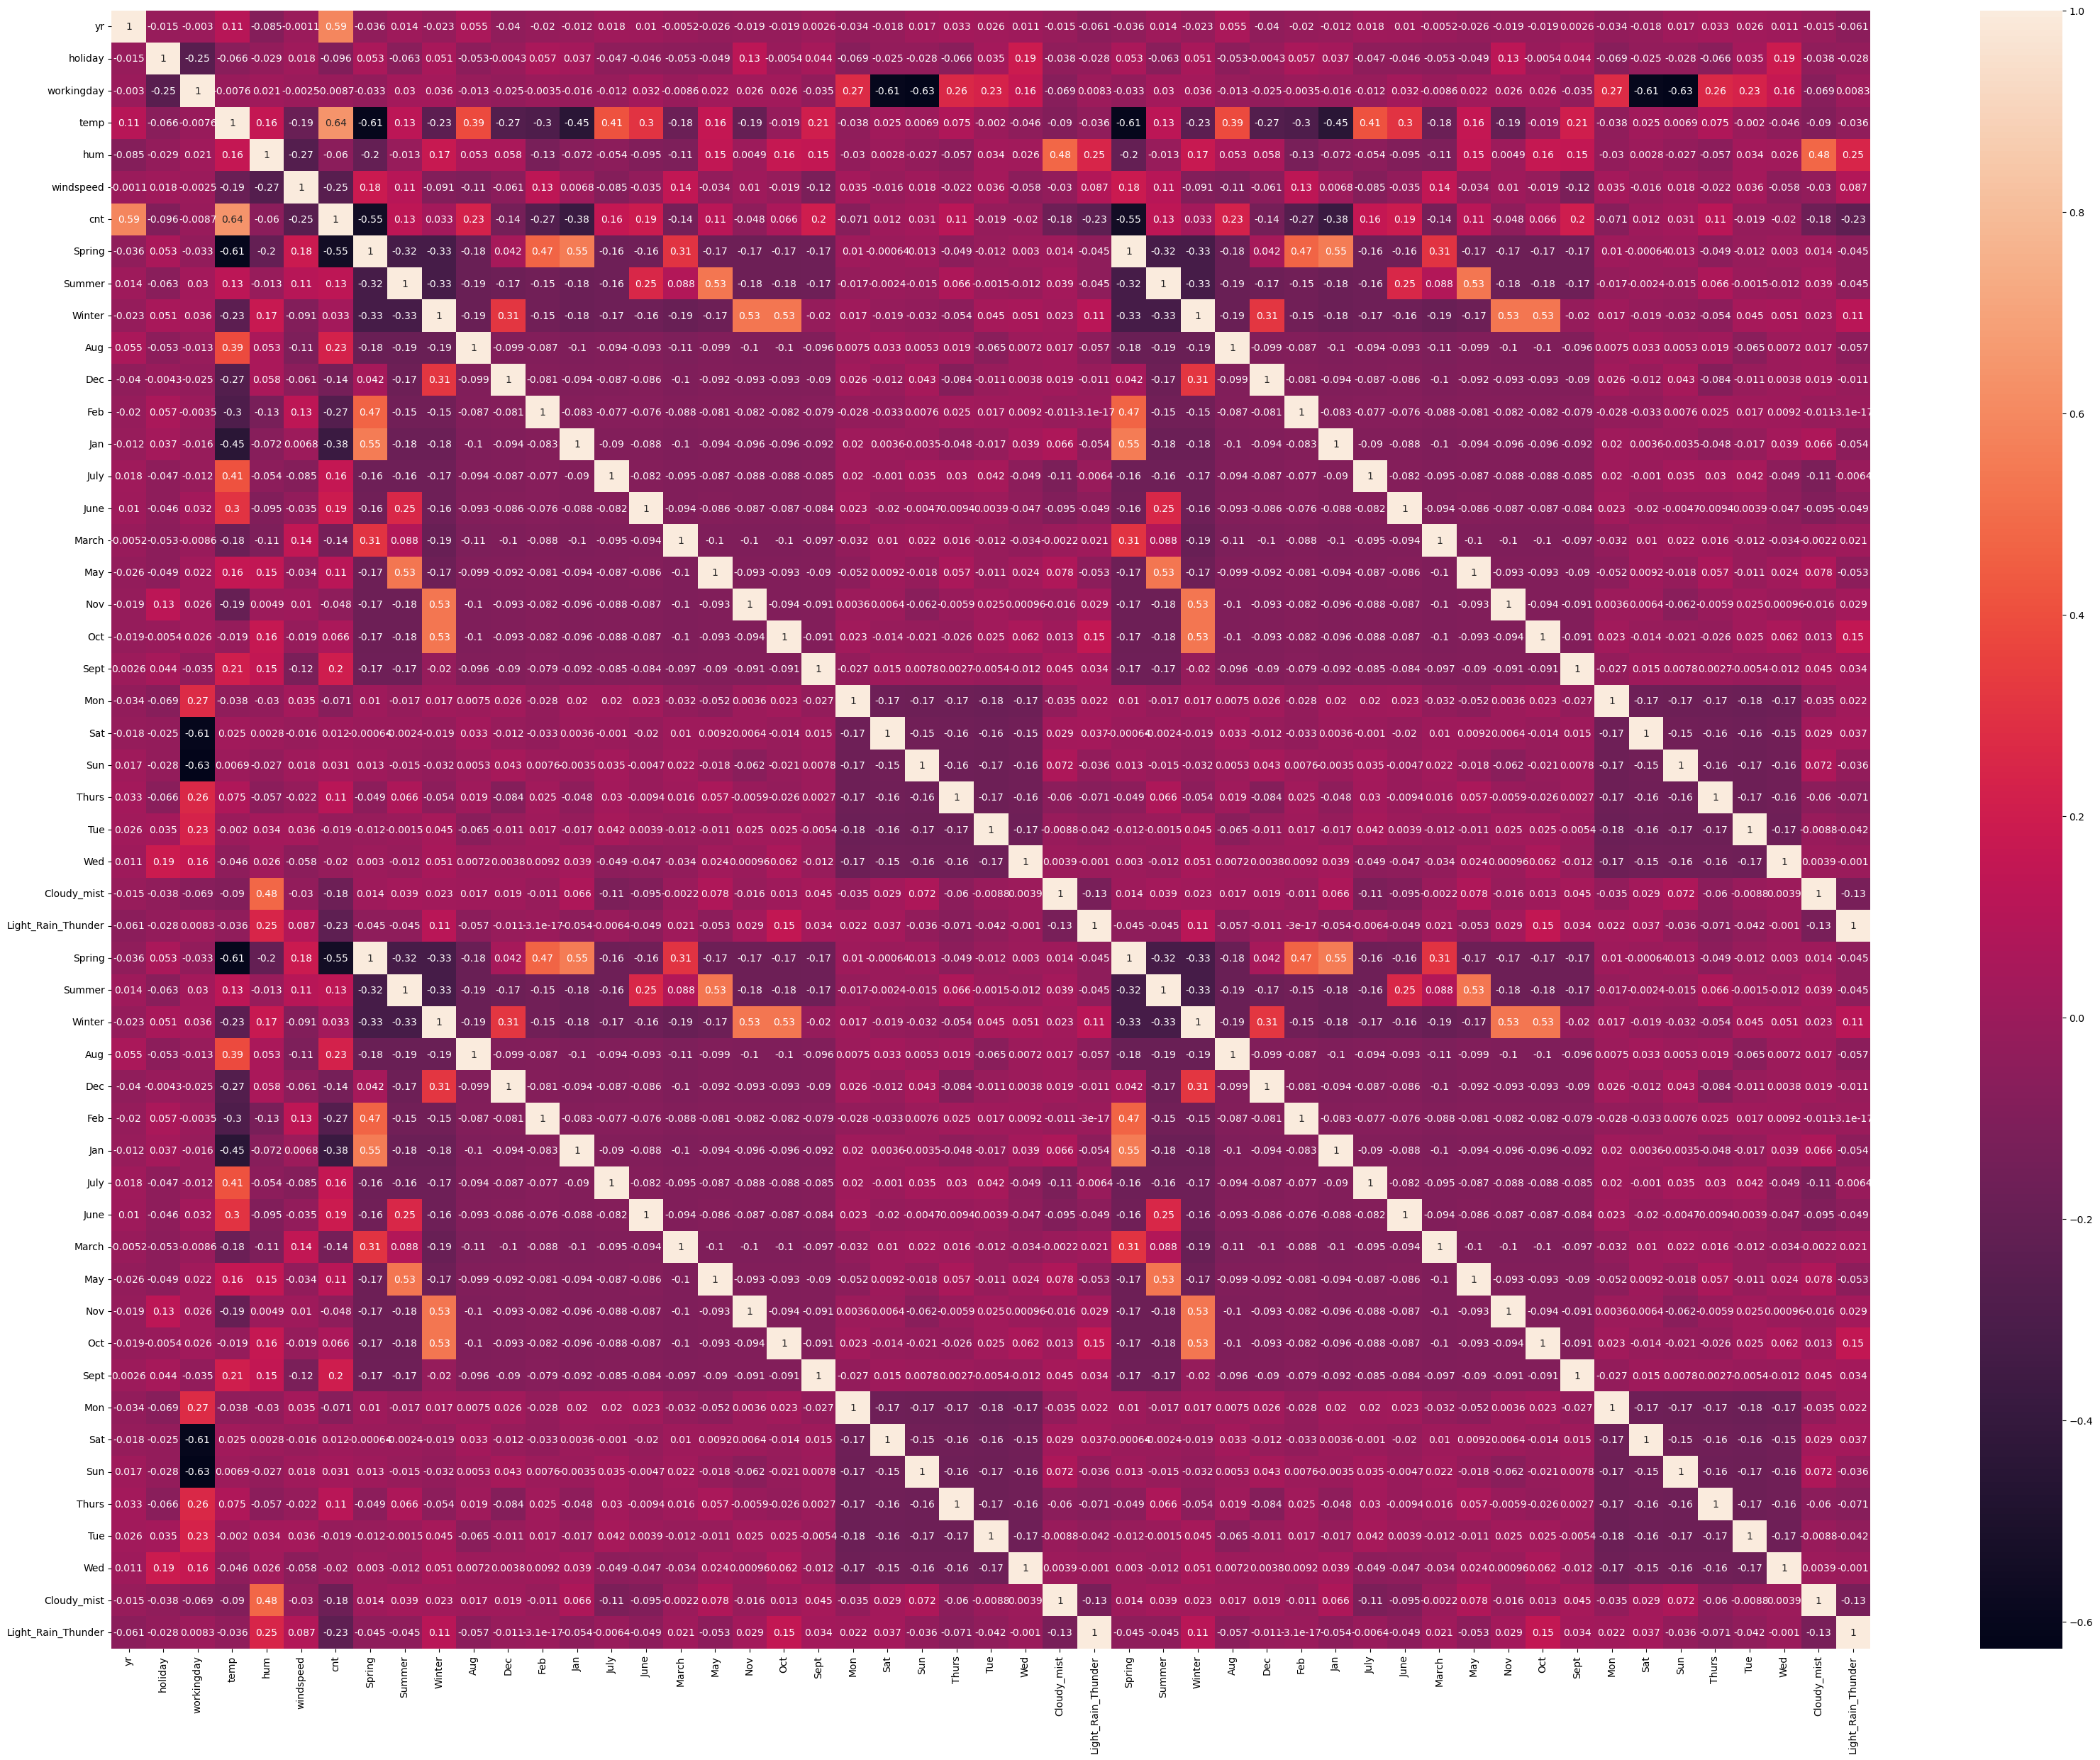

In [38]:
# Finding out the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (40, 30))
sns.heatmap(bike_train.corr(), annot = True)
plt.show()

INSIGHTS - 

- cnt is strongly positively correlated with temp. It implies that higher temperatures are associated with higher counts, which could imply more usage or activity during warmer weather.

- cnt also has a moderate negative correlation with windspeed, meaning higher wind speeds might be associated with a lower count.

- hum has a positive correlation with cnt, indicating that higher humidity might be associated with higher counts.

- holiday and working day have relatively low correlations with others, indicating that holidays and working days might not have a significant linear relationship with the other variables in the dataset.

In [39]:
bike_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 653 to 79
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   yr                  510 non-null    object 
 1   holiday             510 non-null    int64  
 2   workingday          510 non-null    int64  
 3   temp                510 non-null    float64
 4   hum                 510 non-null    float64
 5   windspeed           510 non-null    float64
 6   cnt                 510 non-null    int64  
 7   Spring              510 non-null    bool   
 8   Summer              510 non-null    bool   
 9   Winter              510 non-null    bool   
 10  Aug                 510 non-null    bool   
 11  Dec                 510 non-null    bool   
 12  Feb                 510 non-null    bool   
 13  Jan                 510 non-null    bool   
 14  July                510 non-null    bool   
 15  June                510 non-null    bool   
 16  March       

- Considering temp is highly correlated with cnt we will start with temp.

-------------------------------------------------------------------------------------------------------------------------------

- Dividing into X and y, and further closer to model building

In [40]:
y_train = bike_train.pop('cnt')
X_train = bike_train

In [41]:
X_train.shape

(510, 50)

In [42]:
y_train.shape

(510,)

In [43]:
y_train.head()

653    7534
576    7216
426    4066
728    1796
482    4220
Name: cnt, dtype: int64

# Step 6 : Building linear model

In [45]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['temp']])

# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_lm).fit()

In [46]:
#Checking for the parameters

lr_1.params

const    1497.882426
temp     5562.458744
dtype: float64

In [47]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Sun, 25 Aug 2024   Prob (F-statistic):           5.80e-61
Time:                        11:30:34   Log-Likelihood:                -4450.9
No. Observations:                 510   AIC:                             8906.
Df Residuals:                     508   BIC:                             8914.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1497.8824    171.056      8.757      0.0

INSIGHT

- We can see the r-squared value is 0.414, which implies that 41.4% of the variation in cnt can be explained by temp. 
- We can cheeck other dependent variables to find a better correlation

- Using Regression (Model 2)

In [48]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Spring',
       'Summer', 'Winter', 'Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'March',
       'May', 'Nov', 'Oct', 'Sept', 'Mon', 'Sat', 'Sun', 'Thurs', 'Tue', 'Wed',
       'Cloudy_mist', 'Light_Rain_Thunder', 'Spring', 'Summer', 'Winter',
       'Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'March', 'May', 'Nov',
       'Oct', 'Sept', 'Mon', 'Sat', 'Sun', 'Thurs', 'Tue', 'Wed',
       'Cloudy_mist', 'Light_Rain_Thunder'],
      dtype='object')

In [49]:
len(X_train.columns)

50

In [55]:
# Adding a constant column 'X_train' using statsmodels
X_train_lm = sm.add_constant(X_train)

# Fit Ordinary Least Squares (OLS) regression model using statsmodels
lr_2 = sm.OLS(y_train, X_train_lm.astype(float)).fit()

In [56]:
lr_2.params

const                -4.045883e+06
yr                    2.006607e+03
holiday              -1.177104e+03
workingday           -5.260767e+02
temp                  3.871921e+03
hum                  -1.367380e+03
windspeed            -1.591037e+03
Spring               -1.899408e+02
Summer                1.835876e+02
Winter                4.819581e+02
Aug                   9.346981e+01
Dec                  -1.984785e+02
Feb                  -1.620135e+02
Jan                  -2.764568e+02
July                 -1.517175e+02
June                  4.235207e+00
March                 2.642283e+00
May                   1.045829e+02
Nov                  -1.805965e+02
Oct                   2.516309e+01
Sept                  3.739952e+02
Mon                  -1.070549e+02
Sat                  -2.447629e+02
Sun                  -2.171323e+02
Thurs                 1.678983e+01
Tue                  -1.142964e+02
Wed                  -4.885254e+01
Cloudy_mist          -2.579574e+02
Light_Rain_Thunder  

In [54]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     98.04
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          4.33e-179
Time:                        11:44:14   Log-Likelihood:                -4102.0
No. Observations:                 510   AIC:                             8262.
Df Residuals:                     481   BIC:                             8385.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -4.046e+06   1.43

INSIGHT- 

- R-squared value indicates that approximately 85.1% of the variation in the dependent variable (cnt) can be explained by the independent variables in the model. It is a strong fit.

- However, as mentioned above there are signs of multicollinearity. 

- To curb that issue, we can start dropping columns with high p value and fixing the collinearity.

- Model 3

In [58]:
#Dropping 'March' feature as the p value is high, inooder to fit the model.

X_train.drop(['March'], axis = 1, inplace = True)

In [60]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_3 = sm.OLS(y_train, X_train_lm.astype(float)).fit()

In [61]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     101.9
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          4.24e-180
Time:                        13:53:18   Log-Likelihood:                -4102.0
No. Observations:                 510   AIC:                             8260.
Df Residuals:                     482   BIC:                             8379.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -4.046e+06   1.43

- INSIGHT-

- R-squared value indicates that approximately 85.1% of the variation in the dependent variable (cnt) can be explained by the independent variables in the model. It is a strong fit.

- However, as mentioned above there are signs of multicollinearity.

- To curb that issue, we can continue to drop columns with high p value and fixing the collinearity.

- Model 4

In [63]:
#Dropping 'June' feature as the p value is high, inooder to fit the model.

X_train.drop(['June'], axis = 1, inplace = True)

In [64]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_4 = sm.OLS(y_train, X_train_lm.astype(float)).fit()

In [65]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     106.0
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          4.08e-181
Time:                        13:57:58   Log-Likelihood:                -4102.0
No. Observations:                 510   AIC:                             8258.
Df Residuals:                     483   BIC:                             8372.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -4.045e+06   1.42

INSIGHT-

- R-squared value indicates that approximately 85.1% of the variation in the dependent variable (cnt) can be explained by the independent variables in the model. It is a strong fit.

- However, as mentioned above there are signs of multicollinearity.

- To curb that issue, we can continue to drop columns with high p value and fixing the collinearity

- Model 5

In [66]:
#Dropping 'Oct' feature as the p value is high, inooder to fit the model.

X_train.drop(['Oct'], axis = 1, inplace = True)

In [67]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_5 = sm.OLS(y_train, X_train_lm.astype(float)).fit()

In [68]:
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     110.5
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          3.90e-182
Time:                        14:03:17   Log-Likelihood:                -4102.0
No. Observations:                 510   AIC:                             8256.
Df Residuals:                     484   BIC:                             8366.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -4.045e+06   1.42

INSIGHT-

- R-squared value indicates that approximately 85.1% of the variation in the dependent variable (cnt) can be explained by the independent variables in the model. It is a strong fit.

- However, as mentioned above there are signs of multicollinearity.

- To curb that issue, we can continue to drop columns with high p value and fixing the collinearity

- Model 6

In [69]:
#Dropping 'Thurs' feature as the p value is high, inooder to fit the model.

X_train.drop(['Thurs'], axis = 1, inplace = True)

In [70]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_6 = sm.OLS(y_train, X_train_lm.astype(float)).fit()

In [71]:
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     115.3
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          3.71e-183
Time:                        14:06:52   Log-Likelihood:                -4102.0
No. Observations:                 510   AIC:                             8254.
Df Residuals:                     485   BIC:                             8360.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -4.046e+06   1.41

INSIGHT - 

- We have deleted few columns and have adjusted a model in a better manner. 
- Let us keep deleting high p value feature columns

- Model 7

In [78]:
#Dropping 'Sun' feature as the p value is high, inooder to fit the model.

X_train.drop(['Sun'], axis = 1, inplace = True)

In [80]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_7 = sm.OLS(y_train, X_train_lm.astype(float)).fit()

In [81]:
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     120.4
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          4.37e-184
Time:                        14:30:58   Log-Likelihood:                -4102.3
No. Observations:                 510   AIC:                             8253.
Df Residuals:                     486   BIC:                             8354.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -4.053e+06   1.41

INSIGHT -

Let us keep deleting high p value feature columns to fit the model

- Model 8

In [83]:
#Dropping 'Tworkingday' feature as the p value is high, inooder to fit the model.

X_train.drop(['workingday'], axis = 1, inplace = True)

In [84]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_8 = sm.OLS(y_train, X_train_lm.astype(float)).fit()

In [85]:
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     126.0
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          5.06e-185
Time:                        14:36:29   Log-Likelihood:                -4102.6
No. Observations:                 510   AIC:                             8251.
Df Residuals:                     487   BIC:                             8349.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -4.055e+06   1.41

INSIGHT -

Let us keep deleting high p value feature columns to fit the model

- Model 9

In [86]:
#Dropping 'Sat' feature as the p value is high, inooder to fit the model.

X_train.drop(['Sat'], axis = 1, inplace = True)

In [87]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_9 = sm.OLS(y_train, X_train_lm.astype(float)).fit()

In [88]:
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     132.2
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          4.36e-186
Time:                        14:40:13   Log-Likelihood:                -4102.6
No. Observations:                 510   AIC:                             8249.
Df Residuals:                     488   BIC:                             8342.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -4.055e+06   1.41

INSIGHT -

Let us keep deleting high p value feature columns to fit the model

- Model 10

In [89]:
#Dropping 'Aug' feature as the p value is high, inooder to fit the model.

X_train.drop(['Aug'], axis = 1, inplace = True)

In [90]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_10 = sm.OLS(y_train, X_train_lm.astype(float)).fit()

In [91]:
print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     138.9
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          5.05e-187
Time:                        14:42:49   Log-Likelihood:                -4102.9
No. Observations:                 510   AIC:                             8248.
Df Residuals:                     489   BIC:                             8337.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -4.058e+06   1.41

INSIGHT -

Let us keep deleting high p value feature columns to fit the model

- Model 11

In [92]:
#Dropping 'Wed' feature as the p value is high, inooder to fit the model.

X_train.drop(['Wed'], axis = 1, inplace = True)

In [93]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_11 = sm.OLS(y_train, X_train_lm.astype(float)).fit()

In [94]:
print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     146.0
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          8.12e-188
Time:                        14:44:41   Log-Likelihood:                -4103.7
No. Observations:                 510   AIC:                             8247.
Df Residuals:                     490   BIC:                             8332.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -4.054e+06   1.41

INSIGHT - 

- We can see only one high p value of 'May'. let us drop it and let's see if we consider the upgraded model

- Model 12

In [95]:
#Dropping 'May' feature as the p value is high, inooder to fit the model.

X_train.drop(['May'], axis = 1, inplace = True)

In [96]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_12 = sm.OLS(y_train, X_train_lm.astype(float)).fit()

In [97]:
print(lr_12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     153.9
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          1.44e-188
Time:                        14:49:14   Log-Likelihood:                -4104.5
No. Observations:                 510   AIC:                             8247.
Df Residuals:                     491   BIC:                             8327.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -4.045e+06   1.41

INSIGHTS - 

- We can see that no high p values remain in Model 12. 
- The model fitting percentage is almost 85% and we can consider it for residual analysis and final model building

# Step 7 : Residual analysis of the chosen Model (i.e. Train dataset)

In [99]:
y_train_pred = lr_12.predict(X_train_lm.astype(float))

Text(0.5, 0, 'Errors')

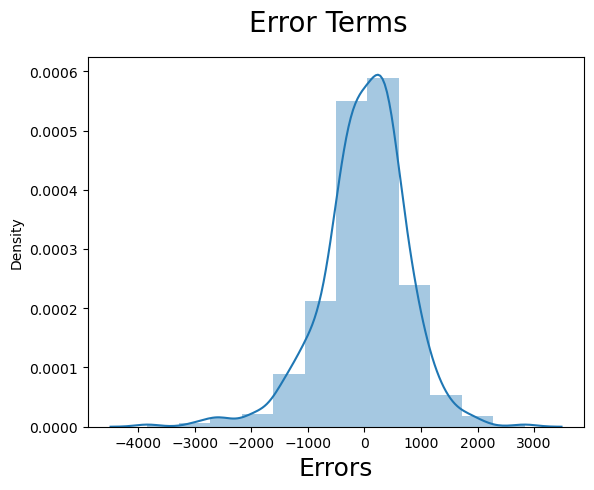

In [100]:
# Plotting a quick histogram to understand the error terms


fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 12)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

INSIGHT - 

- We can see that the error terms are normally distributed implying that the model is fit to the cause i.e. it is aacurate in nature. 

# Step 8: Defining Predictions and Finalinazing the Model

In [107]:
num_columns=['temp','hum','windspeed']
bike_test[num_columns] = scaler.transform(bike_test[num_columns])

In [108]:
bike_test.describe()

,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,Aug,...,Oct,Sept,Mon,Sat,Sun,Thurs,Tue,Wed,Cloudy_mist,Light_Rain_Thunder
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.036530,0.639269,-0.056692,0.006580,-0.080891,4546.981735,0.255708,0.264840,0.232877,0.059361,...,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.319635,0.027397
std,0.188034,0.481313,0.007102,0.001535,0.005132,1898.633630,0.437258,0.442259,0.423633,0.236840,...,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.467403,0.163612
min,0.000000,0.000000,-0.072263,0.002699,-0.092319,441.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,-0.062901,0.005433,-0.084576,3303.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,-0.056700,0.006469,-0.081337,4579.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,-0.050609,0.007666,-0.078013,5869.500000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,-0.043761,0.010327,-0.065037,8395.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- Dividing into X_test and y_test

In [109]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [110]:
X_test.shape

(219, 50)

In [111]:
y_test.shape

(219,)

In [112]:
# Adding constant variable to test dataframe
X_test_m = sm.add_constant(X_test)

In [113]:
X_train.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Spring', 'Summer',
       'Winter', 'Dec', 'Feb', 'Jan', 'July', 'Nov', 'Sept', 'Mon', 'Tue',
       'Cloudy_mist', 'Light_Rain_Thunder', 'Spring', 'Summer', 'Winter',
       'Dec', 'Feb', 'Jan', 'July', 'Nov', 'Sept', 'Mon', 'Tue', 'Cloudy_mist',
       'Light_Rain_Thunder'],
      dtype='object')

In [114]:
X_test_m.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'Spring', 'Summer', 'Winter', 'Aug', 'Dec', 'Feb', 'Jan', 'July',
       'June', 'March', 'May', 'Nov', 'Oct', 'Sept', 'Mon', 'Sat', 'Sun',
       'Thurs', 'Tue', 'Wed', 'Cloudy_mist', 'Light_Rain_Thunder', 'Spring',
       'Summer', 'Winter', 'Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'March',
       'May', 'Nov', 'Oct', 'Sept', 'Mon', 'Sat', 'Sun', 'Thurs', 'Tue', 'Wed',
       'Cloudy_mist', 'Light_Rain_Thunder'],
      dtype='object')

In [115]:
# Creating X_test_m dataframe by dropping variables from X_test_m:

drop_cols = ['March','June','Oct','Thurs','Sun','workingday','Sat',
             'Aug','Wed','May']

X_test_m = X_test_m.drop(drop_cols, axis = 1)

In [117]:
y_pred_m = lr_12.predict(X_test_m.astype(float))

# Step 9 : Evaluating the Model

Text(0, 0.5, 'y_pred')

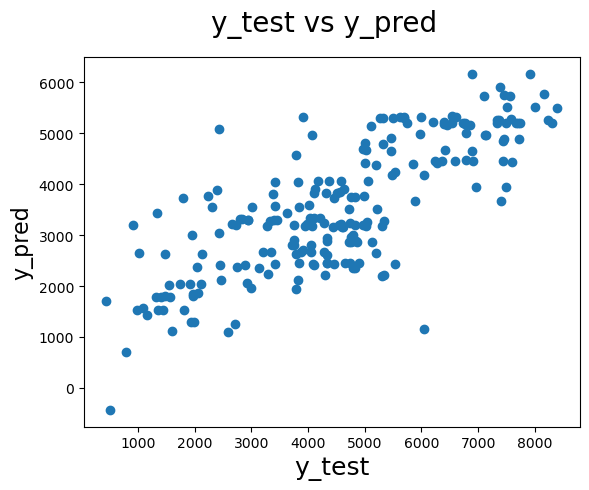

In [118]:
# Plotting y_test and y_pred for understanding the structure


fig = plt.figure()
plt.scatter(y_test, y_pred_m)
fig.suptitle('y_test vs y_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                         
plt.ylabel('y_pred', fontsize = 16)

INSIGHT - 

- The plot shows positive correlation between y_test and y_pred, this indicates that the model captures the trend of the data.
- There is some noticeable scatter, especially as the values increase. 
- The points are clustered around this diagonal,implying that the model's predictions are close to the actual values.

# Step 10 : R - Sqaured Score and Implications

In [120]:
#Finding out the r score

print('Train R-Score:' ,r2_score(y_train,y_train_pred))
print('Test R-Score:' ,r2_score(y_test, y_pred_m))

Train R-Score: 0.8494163101236716
Test R-Score: 0.3195653263922539


- Implications 

- Train R-Score indicates that the model explains approximately 84.94% of the variance in the target variable on the training dataset. We can say that the model fits the training data quite well. 

-------------------------------------------------------------------------------------------------------------------------------

- Test R- Score indicates that the model explains approximately 31.96% of the variance in the target variable on the test dataset. We can say that, this can be due to overfitting as the data is trained too well.  

# Answering Business Questions

- Question - Which variables are significant in predicting the demand for shared bikes?

-------------------------------------------------------------------------------------------------------------------------------

- Answer - yr, holiday, temp, hum, windspeed, Spring, Summer, Winter, Dec, Feb ,Jan ,July, Nov, Sept, Mon, Tue, Cloudy_mist, ight_Rain_Thunder

- Question - How well those variables describe the bike demands

-------------------------------------------------------------------------------------------------------------------------------

- Answer - Those variable show equitable p value and correlation implying that they are dependent on the bike rental agreement.